In [1]:
import sys
sys.path.append('../scripts')  
from models import *
from df_handling import *
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import warnings
import statistics
warnings.filterwarnings("ignore")

In [2]:
#load training datasets training ta panta ektos apo tin postgres
train1 = pd.read_csv('../data/fullfacts_emb.csv')
train2 = pd.read_csv('../data/greek_web_scraping_emb.csv')
train2_1 = pd.read_csv('../data/greek_web_scraping.csv')
train3 = pd.read_csv('../data/snopes2_emb.csv', nrows=1000)
train4 = pd.read_csv('../data/reuters_emb.csv')
train5 = pd.read_csv('../data/cyprus_factcheck_emb.csv')

train1 = unravel_df(train1, ['text_embedding'])
train2 = unravel_df(train2, ['text_embedding'])
train3 = unravel_df(train3, ['text_embedding'])
train4 = unravel_df(train4, ['text_embedding'])
train5 = unravel_df(train5, ['text_embedding'])

In [3]:
#find whick grek data is from greekhoaxes etc
train2_1 = train2_1[['id','url']]
train2_1['source'] = train2_1['url'].apply(lambda x: 0 if "ellinikahoaxes" in x else (1 if "factcheckgreek" in x else None))
train2 = pd.merge(train2, train2_1[['id','source']], on='id', how='inner')

In [4]:
train1['source'] = 2
train3['source'] = 3
train4['source'] = 4
train5['source'] = 5

In [5]:
df_train = pd.concat([train1,train2,train3, train4, train5], ignore_index=True)


In [6]:
#keep only 3 labels
df_train = df_train[df_train.label<=2]
df_train.reset_index(drop=True, inplace=True)


In [7]:
NaiveBayes_list  = list()
LR_list  = list()
KNeigh_list  = list()
RF_list  = list()
DT_list  = list()
SVC_list  = list()
MLP_list  = list()
data_source_train_list = list()
data_source_val_list = list()

#list for sub accuracies
NaiveBayes_list_acc  = list()
LR_list_acc  = list()
KNeigh_list_acc  = list()
RF_list_acc  = list()
DT_list_acc  = list()
SVC_list_acc  = list()
MLP_list_acc  = list()

In [8]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_index, valid_index) in enumerate(kf.split(df_train.text_embedding), 1):
    X_train, X_valid = [df_train.text_embedding[i] for i in train_index], [df_train.text_embedding[i] for i in valid_index ]
    y_train, y_valid = df_train.label[train_index] , df_train.label[valid_index]
    data_source_train, data_source_val = df_train.source[train_index], df_train.source[valid_index]
    

    print(f"Fold {fold}:")
    print("Training data:\n ")
    print(data_source_train.value_counts(), '\n')
    print("Validation data:\n ")
    print(data_source_val.value_counts())
    print("---------------------")

    data_source_train_list.append(data_source_train.value_counts())
    data_source_val_list.append(data_source_val.value_counts())

    nb1, nb2 = cross_val_Naive_Bayes(X_train, y_train, X_valid, y_valid, data_source_val)
    lr1, lr2 = cross_val_LR(X_train, y_train, X_valid, y_valid, data_source_val)
    kn1, kn2 = cross_val_Kneigh(X_train, y_train, X_valid, y_valid, data_source_val)
    svm1, svm2 = cross_val_SVC(X_train, y_train, X_valid, y_valid, data_source_val)
    rf1, rf2 = cross_val_RF(X_train, y_train, X_valid, y_valid, data_source_val)
    dt1, dt2 = cross_val_DT(X_train, y_train, X_valid, y_valid, data_source_val)
    mlp1, mlp2 = cross_val_MLP(X_train, y_train, X_valid, y_valid, data_source_val)

    NaiveBayes_list.append(nb1)
    NaiveBayes_list_acc.append(nb2)

    LR_list.append(lr1)
    LR_list_acc.append(lr2)
 
    KNeigh_list.append(kn1)
    KNeigh_list_acc.append(kn2)

    SVC_list.append(svm1)
    SVC_list_acc.append(svm2)

    RF_list.append(rf1)
    RF_list_acc.append(rf2)

    DT_list.append(dt1)
    DT_list_acc.append(dt2)

    MLP_list.append(mlp1)
    MLP_list_acc.append(mlp2)


Fold 1:
Training data:
 
2    1223
3     700
4     335
1     278
0     201
5     115
Name: source, dtype: int64 

Validation data:
 
2    154
3     59
4     43
1     29
0     18
5     14
Name: source, dtype: int64
---------------------
[0, 14, 17, 32, 44, 45, 51, 52, 63, 70, 76, 88, 93, 102, 120, 134, 139, 144, 149, 152, 170, 174, 175, 178, 184, 188, 192, 194, 196, 203, 211, 214, 218, 229, 239, 240, 246, 251, 254, 256, 257, 263, 266, 270, 289, 291, 298, 299, 309, 314, 321, 322, 324, 331, 332, 346, 354, 368, 387, 410, 430, 432, 439, 442, 449, 450, 463, 471, 485, 486, 495, 501, 507, 528, 554, 555, 568, 578, 594, 596, 602, 605, 610, 611, 612, 670, 679, 685, 695, 705, 729, 734, 736, 746, 756, 759, 772, 801, 805, 831, 839, 862, 874, 879, 881, 889, 900, 903, 926, 927, 929, 930, 932, 937, 940, 949, 964, 969, 999, 1006, 1018, 1027, 1044, 1068, 1074, 1105, 1106, 1113, 1128, 1134, 1173, 1177, 1188, 1210, 1225, 1228, 1236, 1244, 1251, 1255, 1268, 1270, 1272, 1288, 1292, 1295, 1299, 1321, 1336, 13

  File "c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")



Accuracy for data source 2: 0.7987012987012987

Accuracy for data source 0: 1.0

Accuracy for data source 1: 0.7241379310344828

Accuracy for data source 3: 0.6271186440677966

Accuracy for data source 4: 0.8604651162790697

Accuracy for data source 5: 0.7857142857142857
Accuracy for KNeigh: 0.7791798107255521

[(2, 0.7987012987012987), (0, 1.0), (1, 0.7241379310344828), (3, 0.6271186440677966), (4, 0.8604651162790697), (5, 0.7857142857142857)]

Accuracy for data source 2: 0.8181818181818182

Accuracy for data source 0: 1.0

Accuracy for data source 1: 1.0

Accuracy for data source 3: 0.6271186440677966

Accuracy for data source 4: 1.0

Accuracy for data source 5: 0.7142857142857143
Accuracy for SVM: 0.8296529968454258

[(2, 0.8181818181818182), (0, 1.0), (1, 1.0), (3, 0.6271186440677966), (4, 1.0), (5, 0.7142857142857143)]

Accuracy for data source 2: 0.8181818181818182

Accuracy for data source 0: 1.0

Accuracy for data source 1: 0.896551724137931

Accuracy for data source 3: 0.6271

In [11]:
print(statistics.stdev(NaiveBayes_list))
print("LR: ", statistics.stdev(LR_list))
print("k-Neigh: ", statistics.stdev(KNeigh_list))
print("SVC: ", statistics.stdev(SVC_list))
print("RF: ", statistics.stdev(RF_list))
print("DT: ", statistics.stdev(DT_list))
print("MLP: ", statistics.stdev(MLP_list))

0.01742342135739498
LR:  0.021193877976500224
k-Neigh:  0.012687766116849611
SVC:  0.020025091593903834
RF:  0.013820326416948426
DT:  0.027924298120527467
MLP:  0.02160087567089145


In [12]:
df_corr = pd.DataFrame( {'greek_hoaxes_train_count':[data_source_train_list[i][0] for i in range (len(data_source_train_list))], 
                        'factcheckgreek_train_count':[data_source_train_list[i][1] for i in range (len(data_source_train_list))],
                        'fullfacts_train_count': [data_source_train_list[i][2] for i in range (len(data_source_train_list))],
                        'snopes_train_count': [data_source_train_list[i][3] for i in range (len(data_source_train_list))],
                        'reuters_train_count': [data_source_train_list[i][4] for i in range (len(data_source_train_list))],
                        'cyprus_train_count': [data_source_train_list[i][5] for i in range (len(data_source_train_list))],
                        'snopes_val_count':[data_source_val_list[i][3] for i in range (len(data_source_val_list))],
                        'greek_hoaxes_val_count':[data_source_val_list[i][0] for i in range (len(data_source_val_list))], 
                        'factcheckgreek_val_count':[data_source_val_list[i][1] for i in range (len(data_source_val_list))], 
                        'fullfacts_val_count': [data_source_val_list[i][2] for i in range (len(data_source_val_list))],
                        'reuters_val_count': [data_source_val_list[i][4] for i in range (len(data_source_val_list))],
                        'cyprus_val_count': [data_source_val_list[i][5] for i in range (len(data_source_val_list))],


                        'NB_grekhoaxes_acc': [t[1][1] for t in NaiveBayes_list_acc], 'NB_factcheck_acc': [t[2][1] for t in NaiveBayes_list_acc],'NB_snopes_acc': [t[3][1] for t in NaiveBayes_list_acc],'NB_fullfacts_acc': [t[0][1] for t in NaiveBayes_list_acc],'NB_reuters_acc': [t[4][1] for t in NaiveBayes_list_acc],'NB_cyprus_acc': [t[5][1] for t in NaiveBayes_list_acc],
                        'LR_grekhoaxes_acc': [t[1][1] for t in LR_list_acc], 'lr_factcheck_acc': [t[2][1] for t in LR_list_acc],'lr_snopes_acc': [t[3][1] for t in LR_list_acc],'lr_fullfacts_acc': [t[0][1] for t in LR_list_acc],'lr_reuters_acc': [t[4][1] for t in LR_list_acc],'lr_cyprus_acc': [t[5][1] for t in LR_list_acc],
                        'kn_grekhoaxes_acc': [t[1][1] for t in KNeigh_list_acc], 'kn_factcheck_acc': [t[2][1] for t in KNeigh_list_acc],'kn_snopes_acc': [t[3][1] for t in KNeigh_list_acc],'kn_fullfacts_acc': [t[0][1] for t in KNeigh_list_acc],'kn_reuters_acc': [t[4][1] for t in KNeigh_list_acc],'kn_cyprus_acc': [t[5][1] for t in KNeigh_list_acc],
                        'rf_grekhoaxes_acc': [t[1][1] for t in RF_list_acc], 'rf_factcheck_acc': [t[2][1] for t in RF_list_acc],'rf_snopes_acc': [t[3][1] for t in RF_list_acc],'rf_fullfacts_acc': [t[0][1] for t in RF_list_acc],'rf_reuters_acc': [t[4][1] for t in RF_list_acc],'rf_cyprus_acc': [t[5][1] for t in RF_list_acc],
                        'dt_grekhoaxes_acc': [t[1][1] for t in DT_list_acc], 'dt_factcheck_acc': [t[2][1] for t in DT_list_acc],'dt_snopes_acc': [t[3][1] for t in DT_list_acc],'dt_fullfacts_acc': [t[0][1] for t in DT_list_acc],'dt_reuters_acc': [t[4][1] for t in DT_list_acc],'dt_cyprus_acc': [t[5][1] for t in DT_list_acc],
                        'svc_grekhoaxes_acc': [t[1][1] for t in SVC_list_acc], 'svc_factcheck_acc': [t[2][1] for t in SVC_list_acc],'svc_snopes_acc': [t[3][1] for t in SVC_list_acc],'svc_fullfacts_acc': [t[0][1] for t in SVC_list_acc],'svc_reuters_acc': [t[4][1] for t in SVC_list_acc],'svc_cyprus_acc': [t[5][1] for t in SVC_list_acc],
                        'mlp_grekhoaxes_acc': [t[1][1] for t in MLP_list_acc], 'mlp_factcheck_acc': [t[2][1] for t in MLP_list_acc],'mlp_snopes_acc': [t[3][1] for t in MLP_list_acc],'mlp_fullfacts_acc': [t[0][1] for t in MLP_list_acc],'mlp_reuters_acc': [t[4][1] for t in MLP_list_acc],'mlp_cyprus_acc': [t[5][1] for t in MLP_list_acc],



                         




                        'NB_accuracy': NaiveBayes_list,'LR_accuracy': LR_list,'kn_accuracy': KNeigh_list,'RF_accuracy': RF_list,
                        'DT_accuracy': DT_list,'SVC_accuracy': SVC_list,'MLP_accuracy': MLP_list})





In [ ]:
df_corr[['greek_hoaxes_val_per','greek_hoaxes_val_per', 'mlp_grekhoaxes_acc','factcheckgreek_val_count','mlp_factcheck_acc','snopes_val_count','mlp_snopes_acc','fullfacts_val_count','mlp_fullfacts_acc',"mlp_reuters_acc",'mlp_cyprus_acc']]


In [25]:

df_corr[['MLP_accuracy','greek_hoaxes_val_count','greek_hoaxes_val_per', 'mlp_grekhoaxes_acc','factcheckgreek_val_count','mlp_factcheck_acc','snopes_val_count','mlp_snopes_acc','fullfacts_val_count','mlp_fullfacts_acc',"mlp_reuters_acc",'mlp_cyprus_acc']]

,MLP_accuracy,greek_hoaxes_val_count,greek_hoaxes_val_per,mlp_grekhoaxes_acc,factcheckgreek_val_count,mlp_factcheck_acc,snopes_val_count,mlp_snopes_acc,fullfacts_val_count,mlp_fullfacts_acc,mlp_reuters_acc,mlp_cyprus_acc
0,0.766562,18,0.056782,0.888889,29,0.931034,59,0.593220,154,0.714286,0.976744,0.928571
1,0.813880,21,0.066246,0.904762,36,0.972222,64,0.671875,146,0.773973,0.975610,0.888889
2,0.731861,26,0.082019,0.615385,24,0.958333,91,0.637363,124,0.693548,0.951220,0.909091
3,0.757098,21,0.066246,0.857143,35,0.971429,78,0.589744,145,0.724138,0.967742,1.000000
4,0.757098,28,0.088328,0.750000,28,0.964286,72,0.638889,131,0.671756,1.000000,1.000000
5,0.747634,25,0.078864,0.800000,29,1.000000,84,0.654762,130,0.684615,0.906250,0.882353
6,0.747634,18,0.056782,0.833333,29,1.000000,89,0.606742,129,0.720930,0.925000,0.750000
7,0.760252,17,0.053628,0.882353,30,1.000000,85,0.658824,146,0.698630,0.969697,1.000000
8,0.769716,17,0.053628,0.823529,29,1.000000,65,0.646154,149,0.704698,0.925000,1.000000
9,0.753165,28,0.088608,0.928571,38,1.000000,72,0.555556,123,0.707317,0.925000,0.666667


In [ ]:
df_corr.iloc[:, ]

In [22]:
models = ['NB_', 'LR_', 'KN_', 'svc_', 'dt_','rf_','mlp_']
data = ['train','val']
sources = ['greek_hoaxes_','factcheckgreek_','snopes_','fullfacts_','reuters_', 'cyprus_']

for s in sources:
    for d in data:
        column = s + d + '_per'
        df_corr[column] = df_corr[s+d+'_count']/(sum(df_corr[s+d+'_count'] for s in sources))
        # print(f'''{df_corr[column]}''')

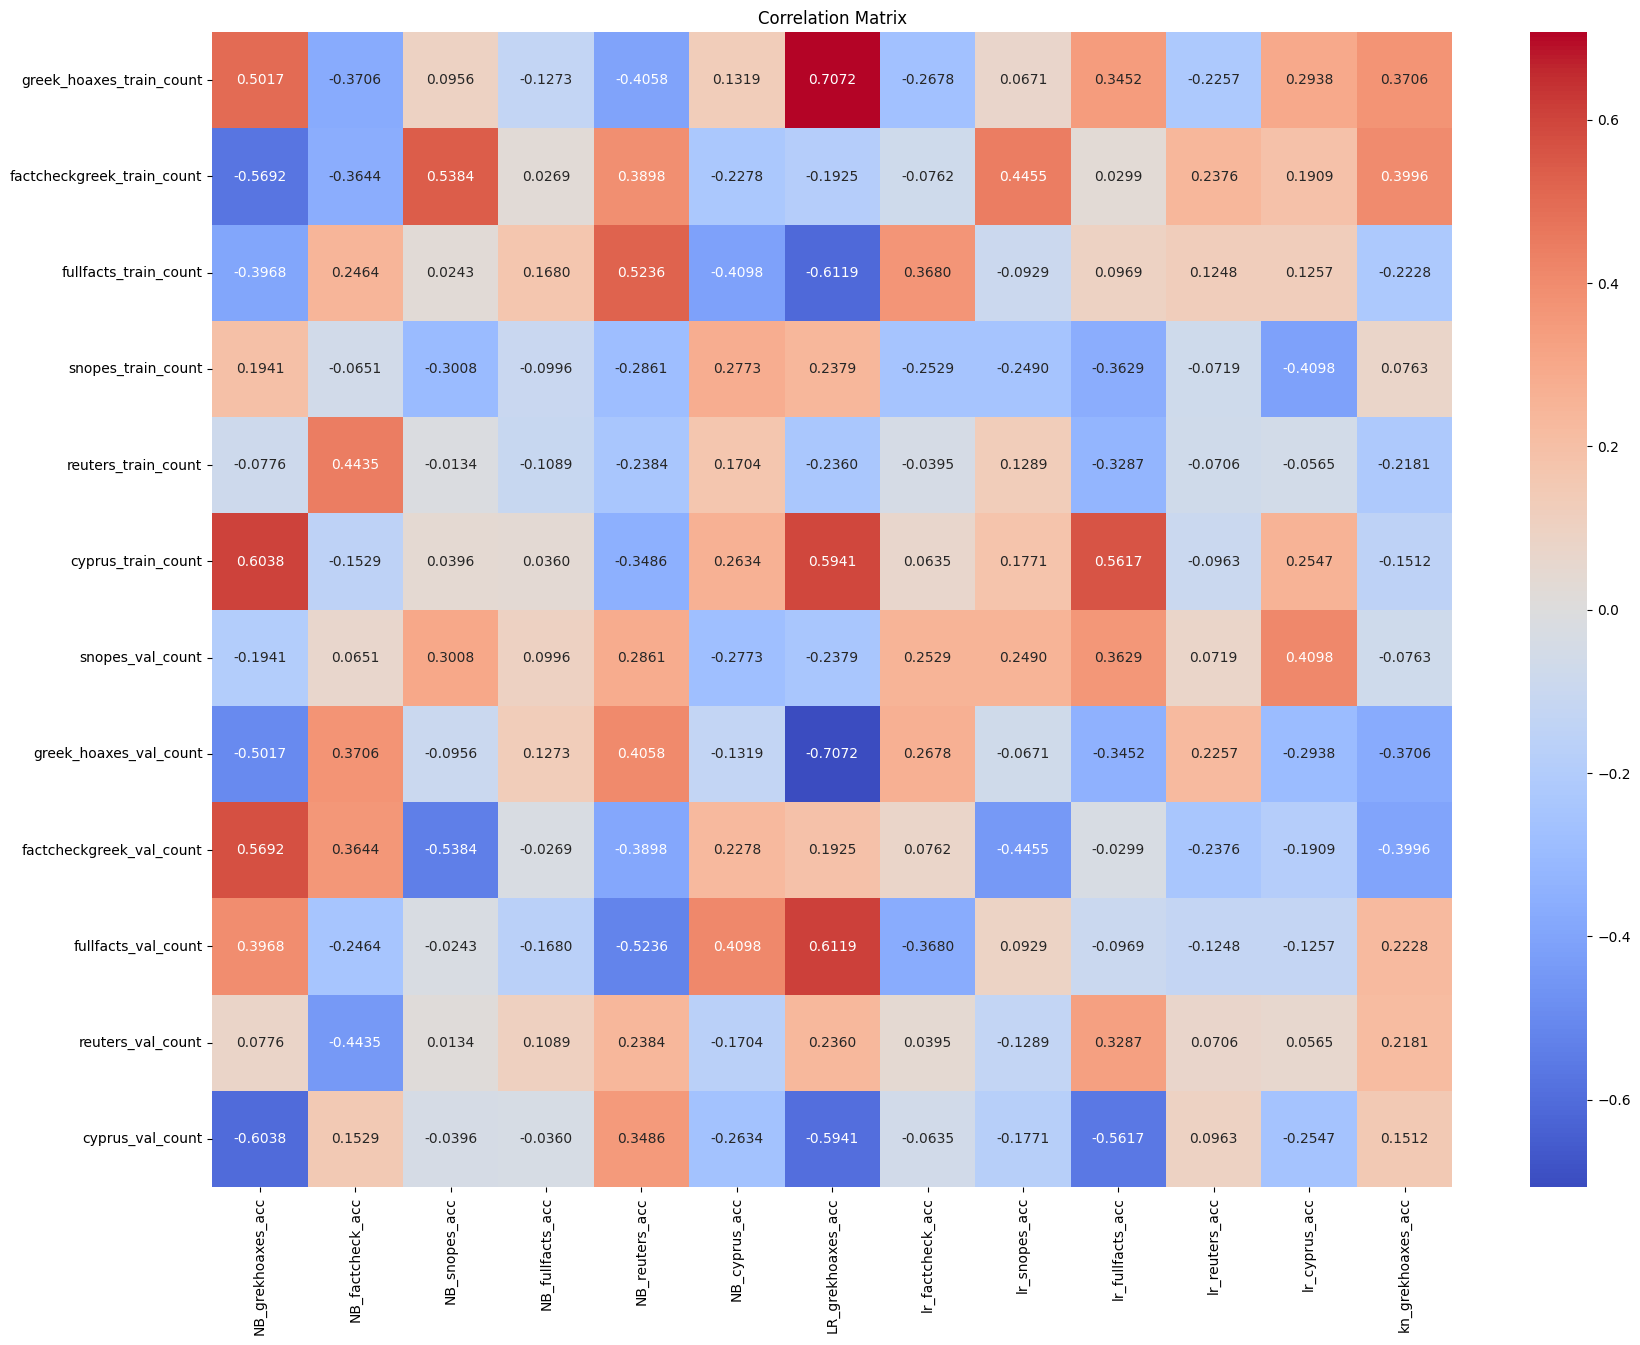

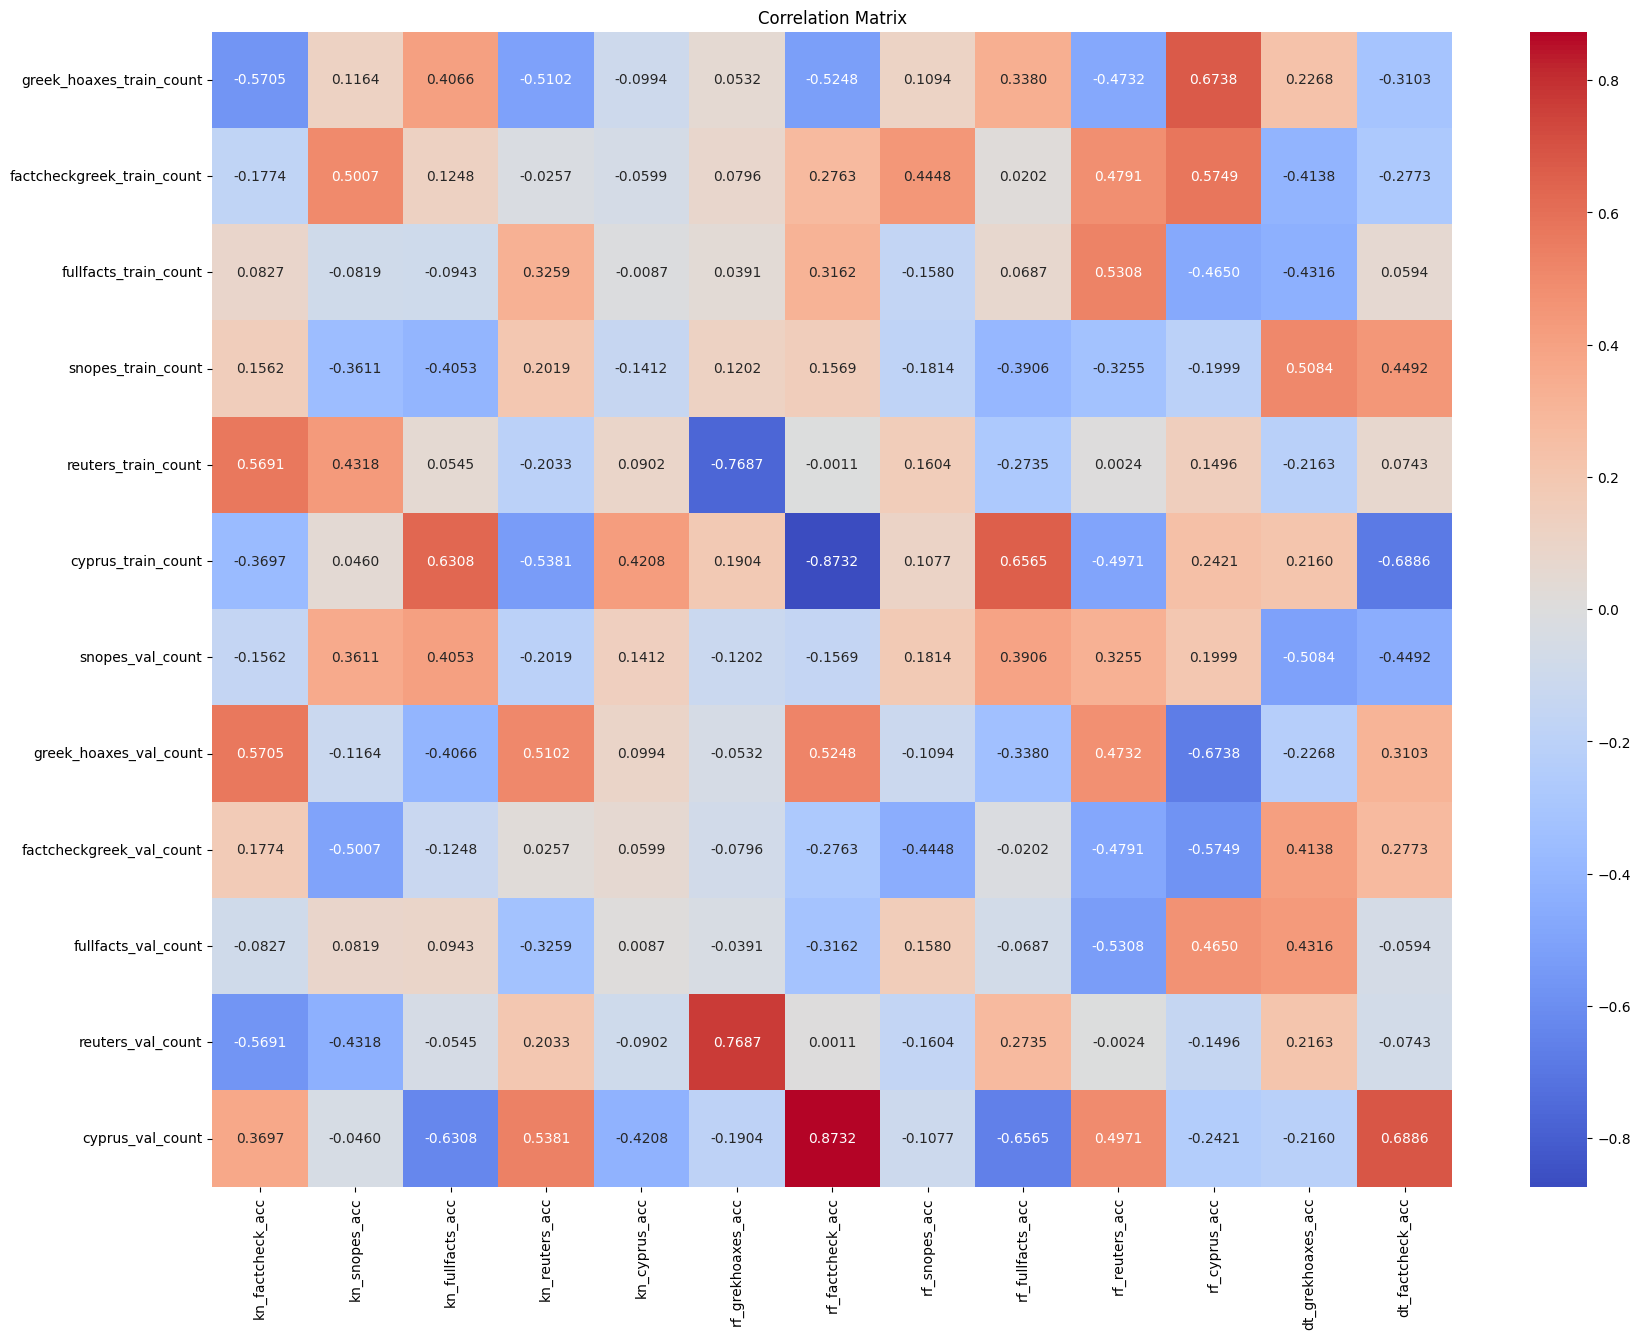

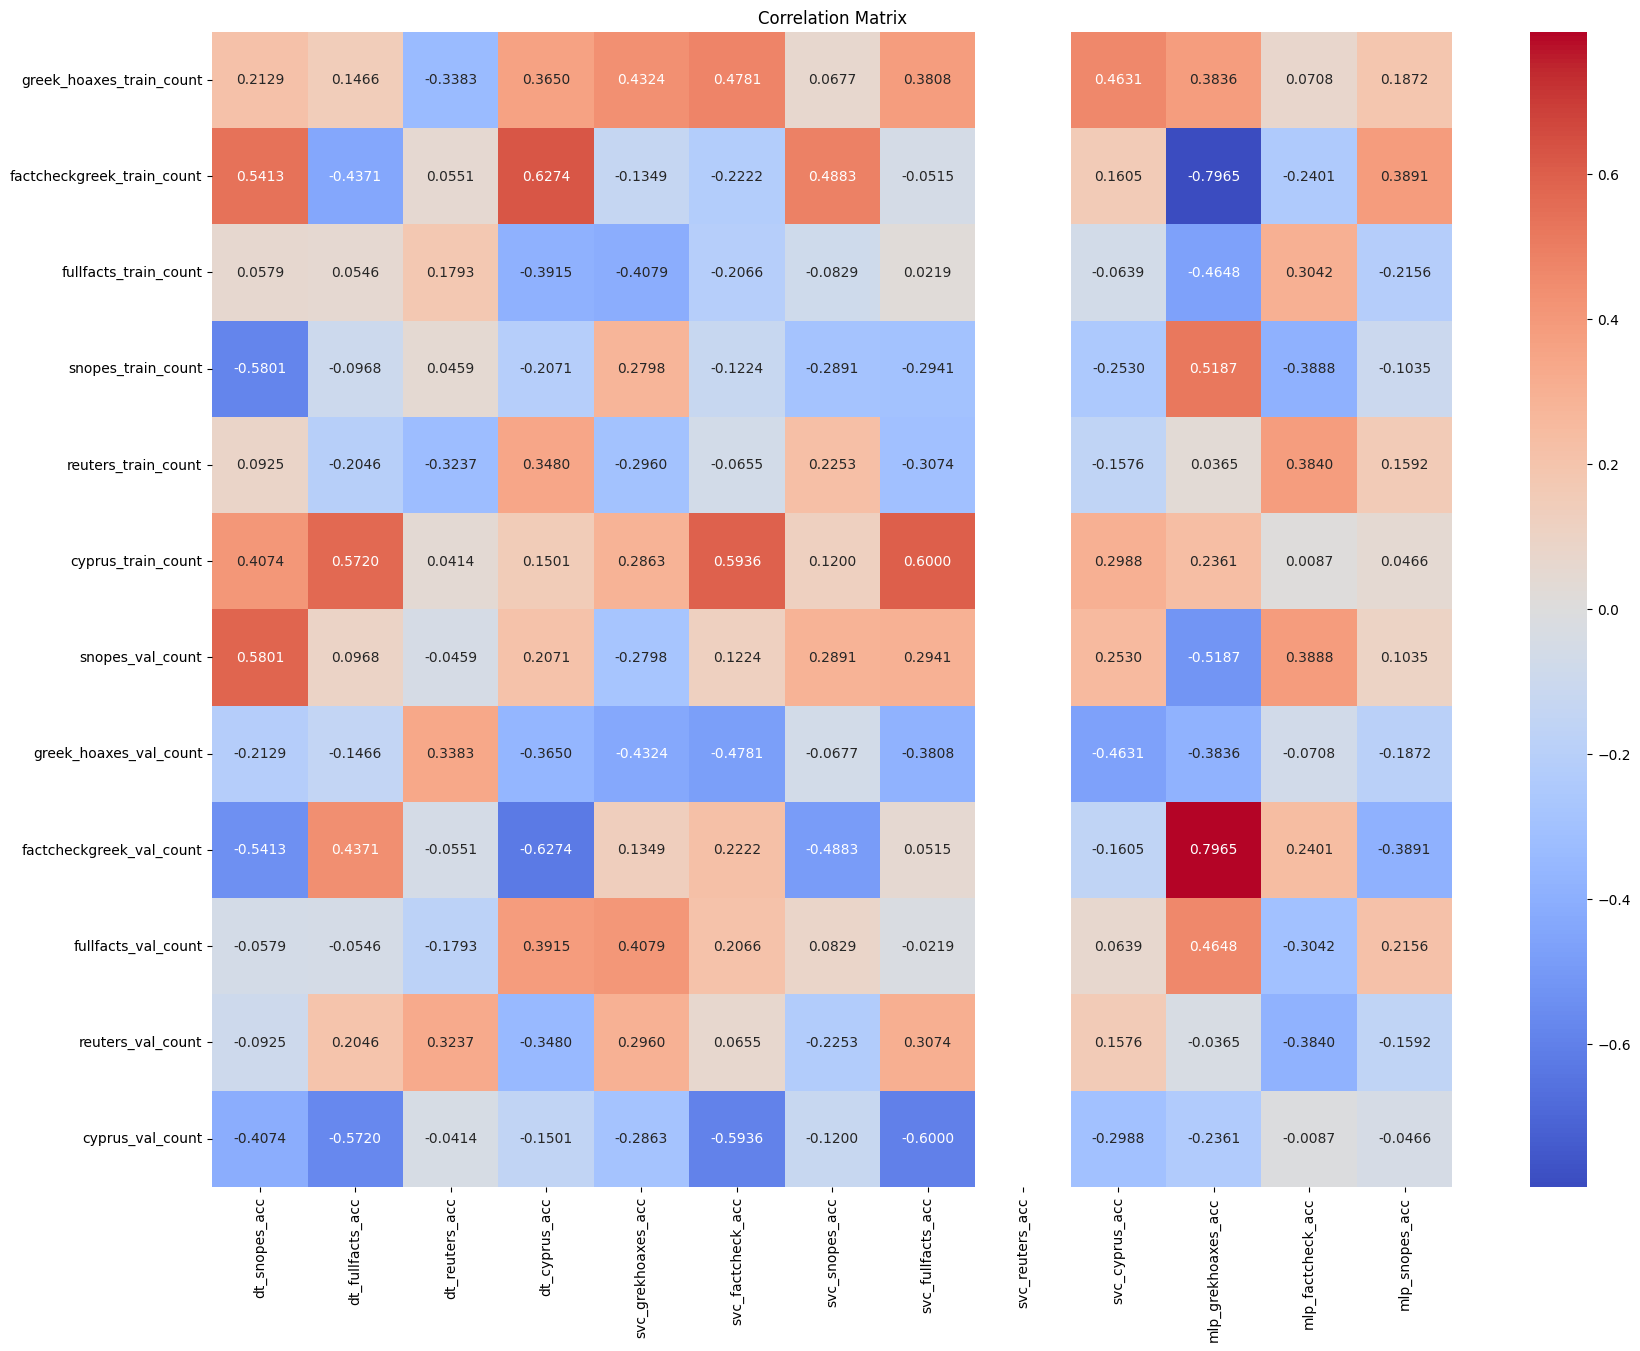

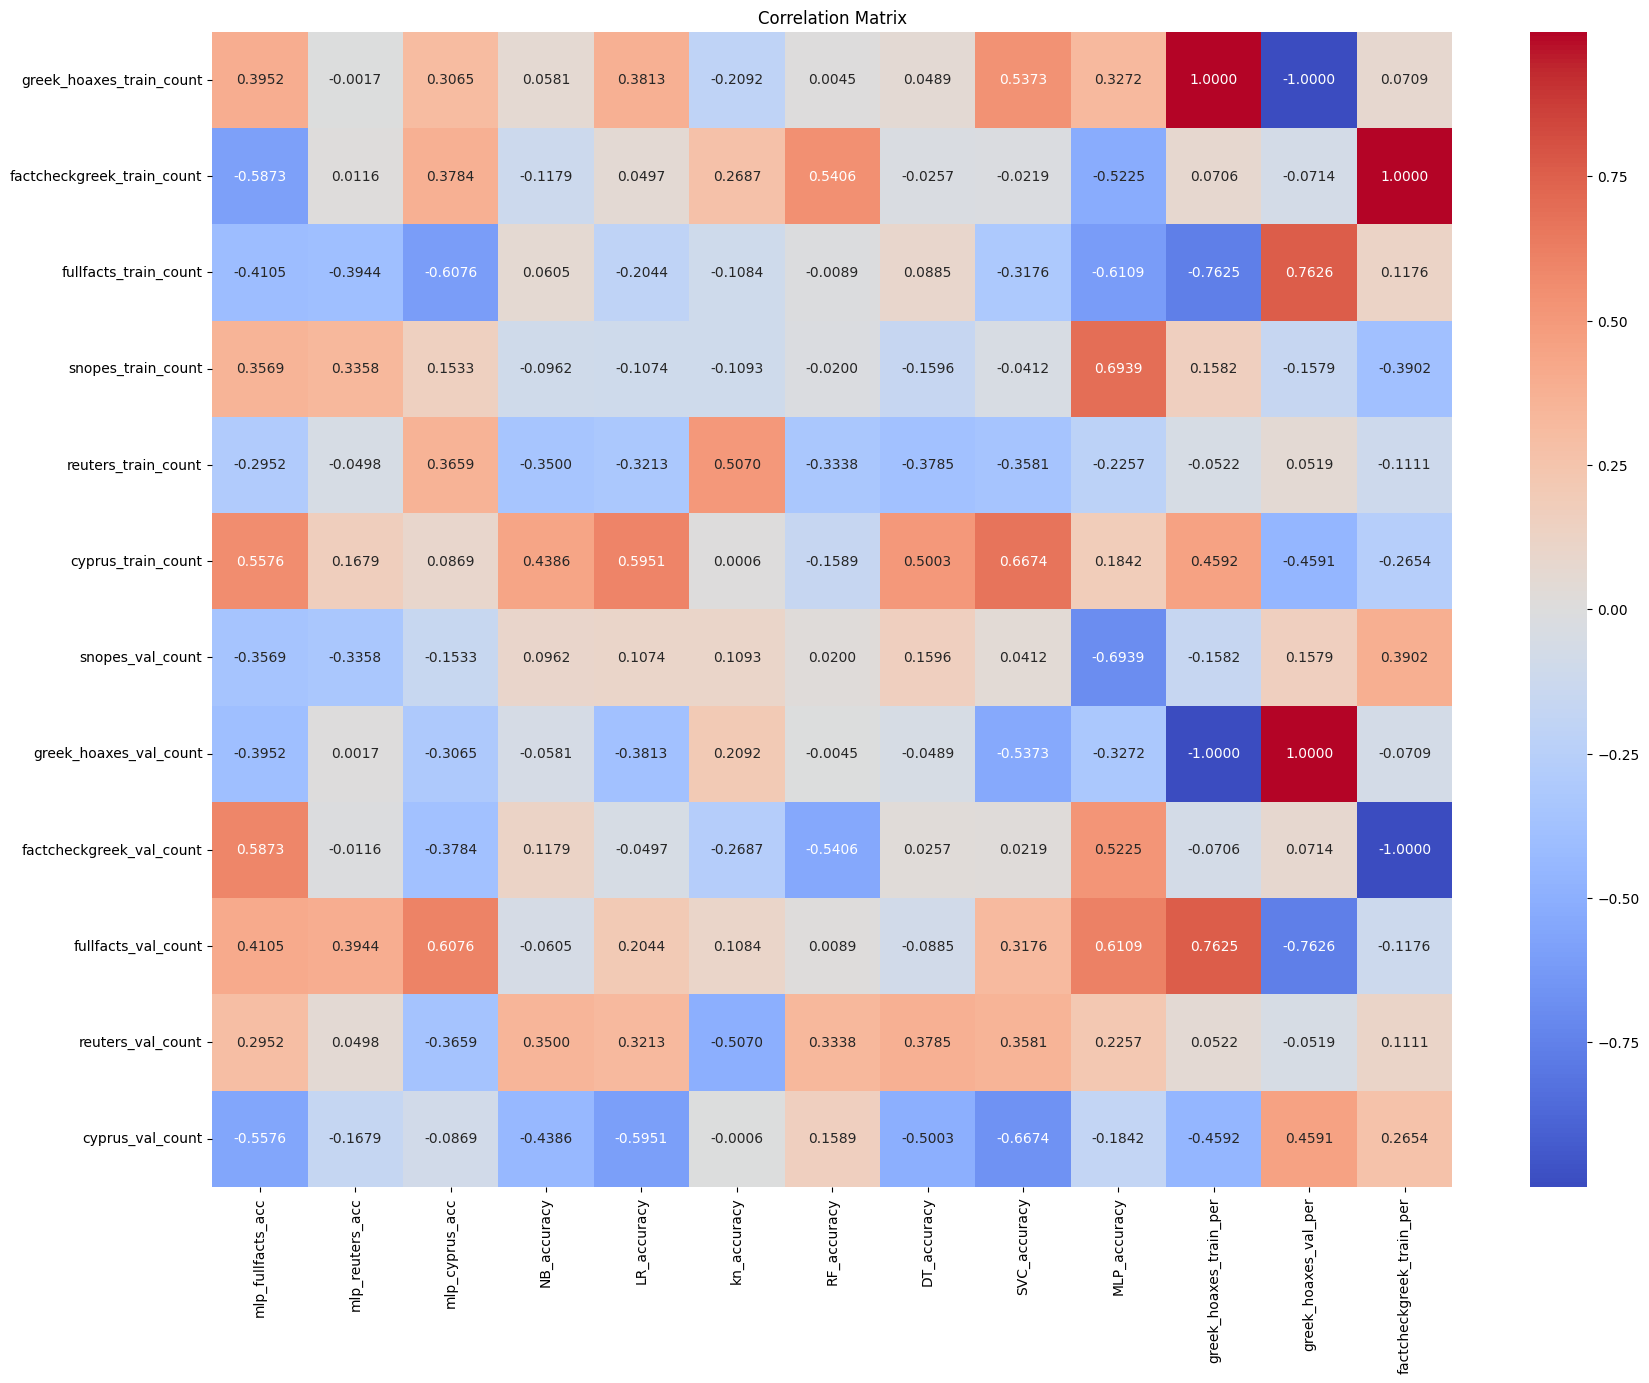

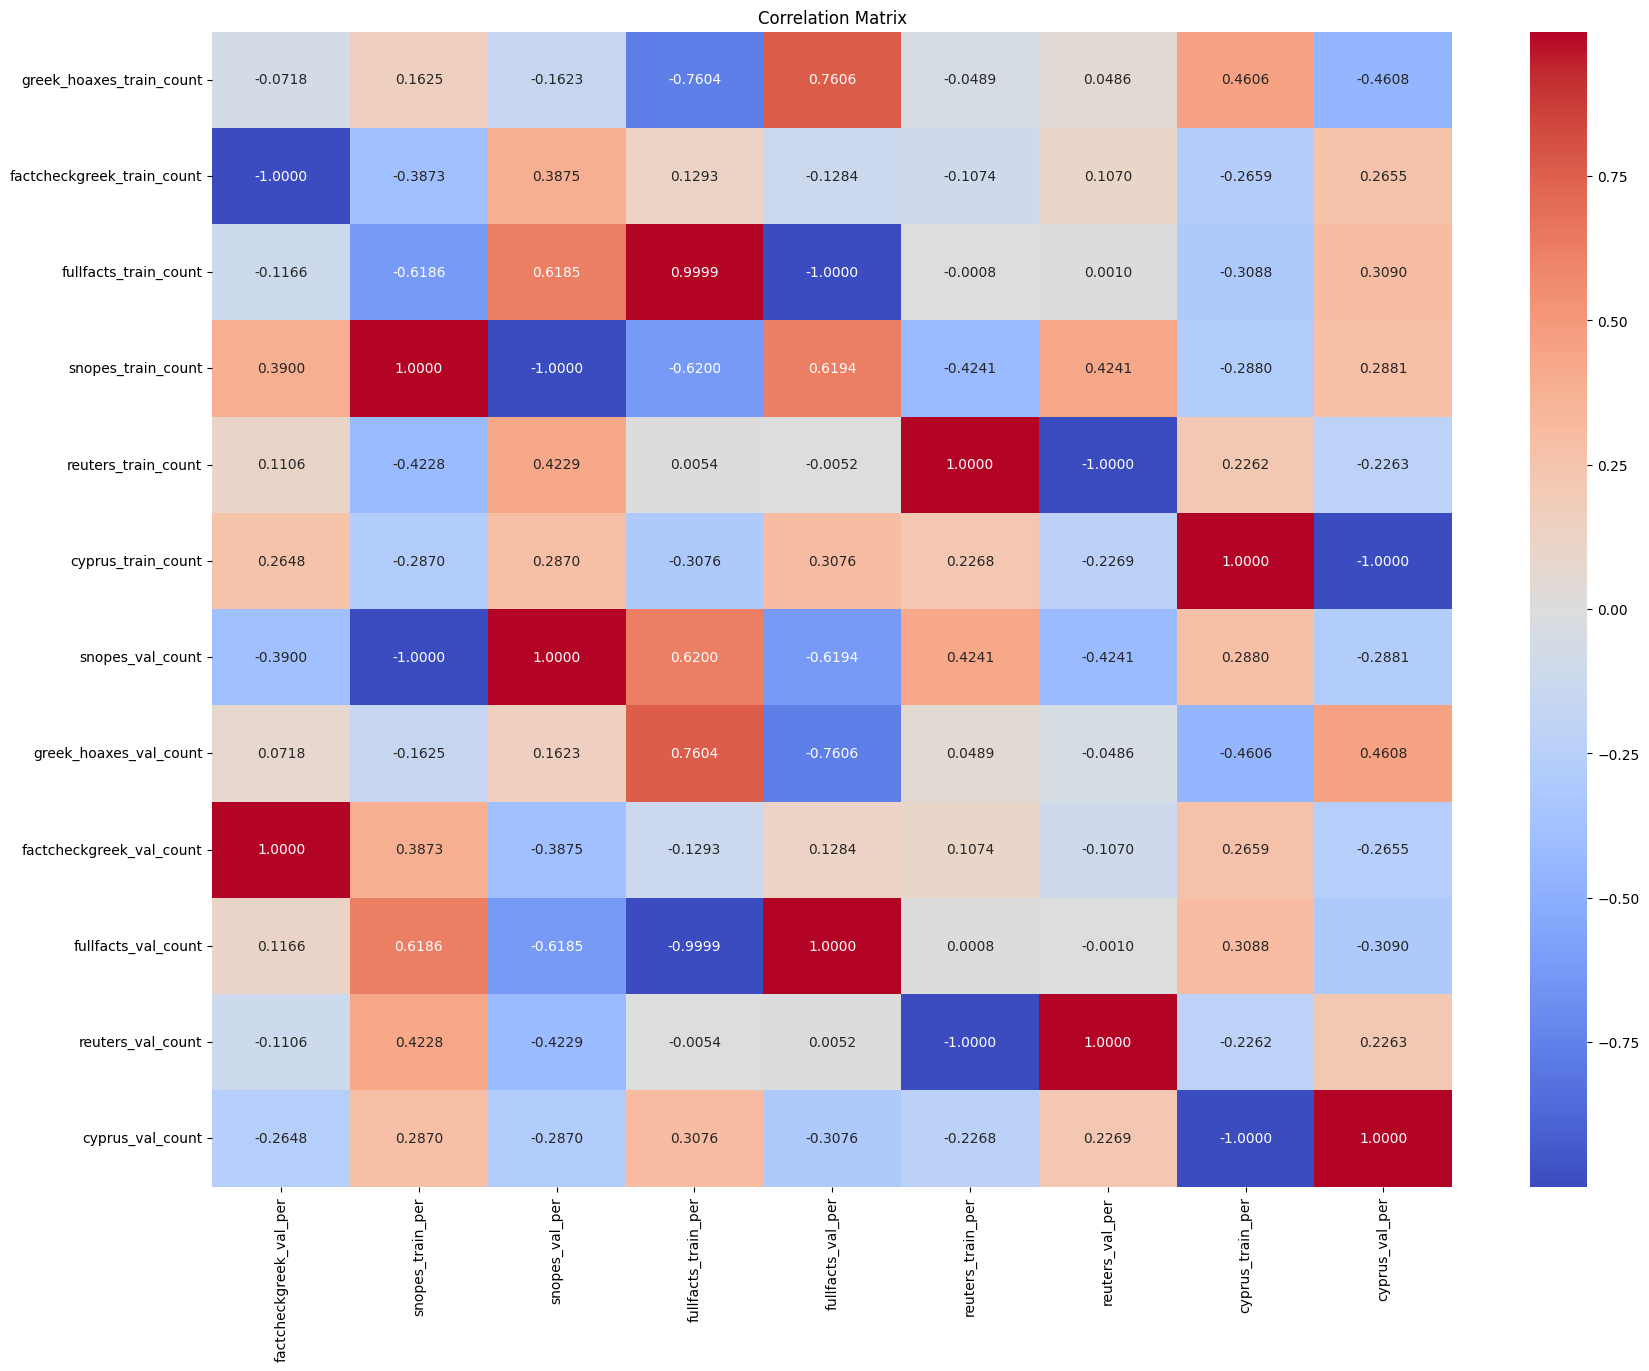

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df_corr.corr()

for i in range(12, 73,13):
    # Plot the correlation matrix using Seaborn
    plt.figure(figsize=(20, 15))
    sns.heatmap(correlation_matrix.iloc[:12,i:i+13], annot=True, cmap='coolwarm', fmt=".4f")
    plt.title('Correlation Matrix')
    plt.show()